<a href="https://colab.research.google.com/github/CD-AC/DataEnginner-Youtube_Statistics/blob/main/Youtube_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

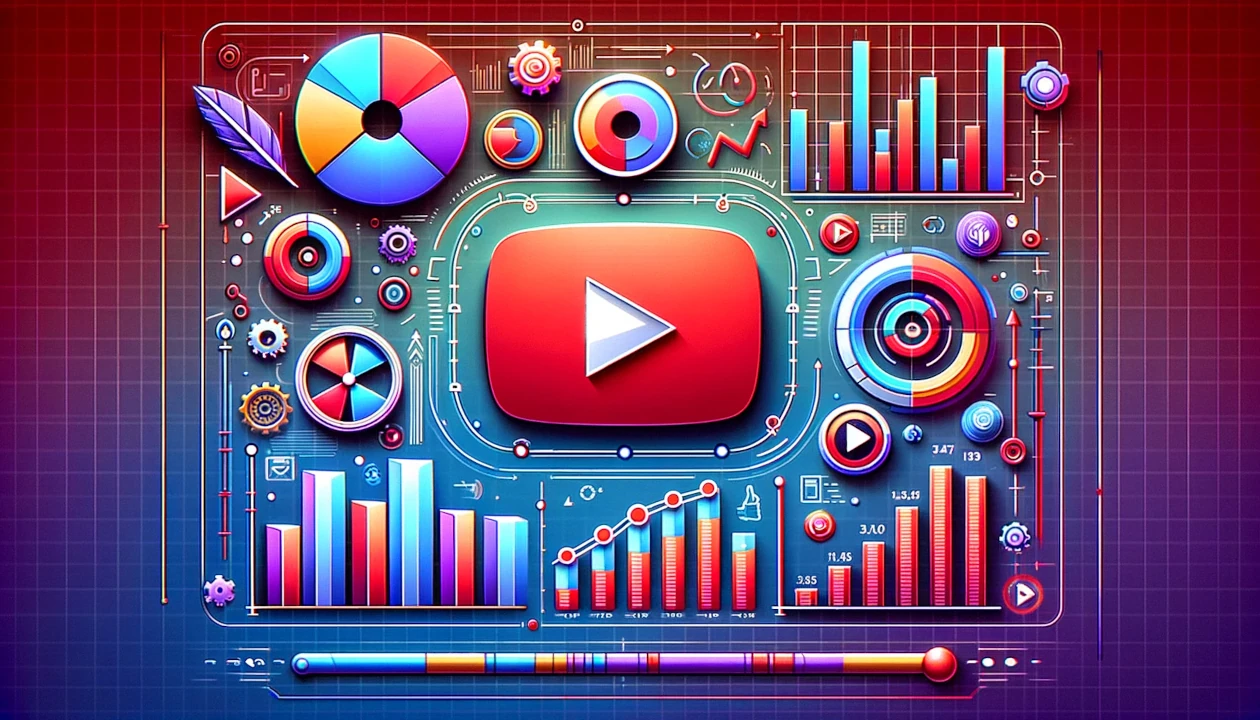

# Import Dependencies

In [ ]:
!pip install millify

In [ ]:
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import json
import random
import time
from datetime import datetime
import datetime
import os
import numpy as np
from millify import millify,prettify
from tqdm import tqdm

import cred_template

In [ ]:
DEVELOPER_KEY = cred_template.API_KEY

# API Youtube Channel Stats

[youtube_url](https://developers.google.com/youtube/v3/docs/channels?hl=es)

# Connect to Youtube channel

In [ ]:
url = "https://www.youtube.com/channel/UCX6OQ3DkcsbYNE6H8uQQuVA"

In [ ]:
CHANNEL_ID = 'UCX6OQ3DkcsbYNE6H8uQQuVA'

url_channel_stats = 'https://youtube.googleapis.com/youtube/v3/channels?part=statistics&id='+CHANNEL_ID+'&key='+DEVELOPER_KEY
channel_stats = requests.get(url_channel_stats).json()
channel_stats

{'kind': 'youtube#channelListResponse',
 'etag': 'ZxsxUa0zsfYEuA8dnVKb3NcLBMg',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': '6of1CMGYs67YACbbcxq0Eph-YiQ',
   'id': 'UCX6OQ3DkcsbYNE6H8uQQuVA',
   'statistics': {'viewCount': '44572869225',
    'subscriberCount': '244000000',
    'hiddenSubscriberCount': False,
    'videoCount': '780'}}]}

# Get channel statistics

In [ ]:
channel_stats = channel_stats['items'][0]['statistics']
date = pd.to_datetime('today').strftime("%Y-%m-%d")

data_channel = {

    'Created_at':date,
    'Total_Views':int(float(channel_stats['viewCount'])),
    'Suscribers':int(float(channel_stats['subscriberCount'])),
    'Video_count':int(float(channel_stats['videoCount'])),

}

data_channel

{'Created_at': '2024-03-11',
 'Total_Views': 44572869225,
 'Suscribers': 244000000,
 'Video_count': 780}

In [ ]:
data_channel['Suscribers']

244000000

# Function to obtain statistics of any YouTube channel

In [ ]:
def get_stats(api_key,channel_id):

    url_channel_stats = 'https://youtube.googleapis.com/youtube/v3/channels?part=statistics&id='+channel_id+'&key='+api_key
    channel_stats = requests.get(url_channel_stats).json()


    channel_stats = channel_stats['items'][0]['statistics']
    date = pd.to_datetime('today').strftime("%Y-%m-%d")

    data_channel = {

        'Created_at':date,
        'Total_Views':int(float(channel_stats['viewCount'])),
        'Suscribers':int(float(channel_stats['subscriberCount'])),
        'Video_count':int(float(channel_stats['videoCount'])),

    }

    return data_channel

In [ ]:
get_stats(DEVELOPER_KEY,CHANNEL_ID)

{'Created_at': '2024-03-11',
 'Total_Views': 44572869225,
 'Suscribers': 244000000,
 'Video_count': 780}

# Create Dataframe Channels to Analize

In [ ]:
channels_name  =  ['MrBeast','Like Nastya ESP','Ryan\'s World Español']
channels_id  =  ['UCX6OQ3DkcsbYNE6H8uQQuVA','UCpEJRZdSpdVZ8vh63T9I2KQ','UCRA8YQZnqAZM8Nj-_4FlfGg']

In [ ]:
channels = {
    'Channel_name':channels_name,
    'Channel_id':channels_id}

df_channels = pd.DataFrame(channels)

In [ ]:
df_channels

,Channel_name,Channel_id
0,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA
1,Like Nastya ESP,UCpEJRZdSpdVZ8vh63T9I2KQ
2,Ryan's World Español,UCRA8YQZnqAZM8Nj-_4FlfGg


In [ ]:
get_stats(DEVELOPER_KEY,df_channels['Channel_id'][1])

{'Created_at': '2024-03-11',
 'Total_Views': 19570205566,
 'Suscribers': 39800000,
 'Video_count': 819}

# Function to automate the obtaining of statistics from several YouTube channels

In [ ]:
def channel_stats(df,api_key):

    date = []
    views = []
    suscriber = []
    video_count = []
    channel_name = []

    tiempo = [1,2.5,3,2]


    for i in tqdm(range(len(df)),colour = 'green'):

        stats_temp = get_stats(DEVELOPER_KEY,df_channels['Channel_id'][i])

        date.append(stats_temp['Created_at'])
        views.append(stats_temp['Total_Views'])
        suscriber.append(stats_temp['Suscribers'])
        video_count.append(stats_temp['Video_count'])
        channel_name.append(df['Channel_name'][i])

        time.sleep(random.choice(tiempo))

    data = {

        'Channel_name':channel_name,
        'Suscribers':suscriber,
        'Video_Count':video_count,
        'Total_Views':views,
        'created_at':date,

    }

    df_channels_final = pd.DataFrame(data)

    return df_channels_final

In [ ]:
channel_stats(df_channels,DEVELOPER_KEY)

100%|██████████| 3/3 [00:08<00:00,  2.80s/it]


,Channel_name,Suscribers,Video_Count,Total_Views,created_at
0,MrBeast,244000000,780,44572869225,2024-03-11
1,Like Nastya ESP,39800000,819,19570205566,2024-03-11
2,Ryan's World Español,4020000,477,1959817841,2024-03-11
